# EDB simple example

This example shows how to use the ``EDBCommon`` class to
open an existing EDB project.

## Perform required imports

Perform the required imports.

In [1]:
import os
import shutil

In [2]:
from ansys.aedt.core import generate_unique_folder_name

In [3]:
from ansys.aedt.toolkits.common.utils import download_file
from ansys.aedt.toolkits.common.backend.api import EDBCommon

## Initialize temporary folder and project settings

Initialize a temporary folder to copy the input file into
and specify project settings.

In [4]:
URL_BASE = "https://raw.githubusercontent.com/ansys/example-data/master/toolkits/common/"
EDB_PROJECT = "edb_edge_ports.aedb/edb.def"
URL = os.path.join(URL_BASE, EDB_PROJECT)

temp_folder = os.path.join(generate_unique_folder_name())

edb_path = os.path.join(temp_folder, "edb_example.aedb")
os.makedirs(edb_path, exist_ok=True)
local_project = os.path.join(edb_path, "edb.def")

download_file(URL, local_project)

'C:\\Users\\ansys\\AppData\\Local\\Temp\\pyaedt_prj_OTV\\edb_example.aedb\\edb.def'

## Initialize toolkit

Initialize the toolkit.

In [5]:
toolkit = EDBCommon()

## Initialize EDB project

Open the EDB project.

In [6]:
load_edb_msg = toolkit.load_edb(edb_path)

PyAEDT INFO: Logger is initialized in EDB.


PyAEDT INFO: legacy v0.37.0


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: Database edb_example.aedb Opened in 2024.2


PyAEDT INFO: Cell EMDesign1 Opened


PyAEDT INFO: Builder was initialized.


PyAEDT INFO: EDB initialized.


DEBUG - Project C:\Users\ansys\AppData\Local\Temp\pyaedt_prj_OTV\edb_example.aedb is opened


## Get toolkit properties

Get toolkit properties, which contain the project information.

In [7]:
new_properties = toolkit.get_properties()
edb_project = new_properties["active_project"]

## Save project

Copy the current project in a new file.

In [8]:
directory, old_file_name = os.path.split(edb_project)
new_path = os.path.join(directory, "new_edb.aedb")
toolkit.save_edb(new_path)

INFO - Project C:\Users\ansys\AppData\Local\Temp\pyaedt_prj_OTV\new_edb.aedb saved


True

## Get cell names

Get cell names using PyEDB.

INFO - Play with EDB


PyAEDT INFO: Plot Generation time 0.219


(<Figure size 6000x3000 with 1 Axes>, <Axes: title={'center': 'Edb Top View'}>)

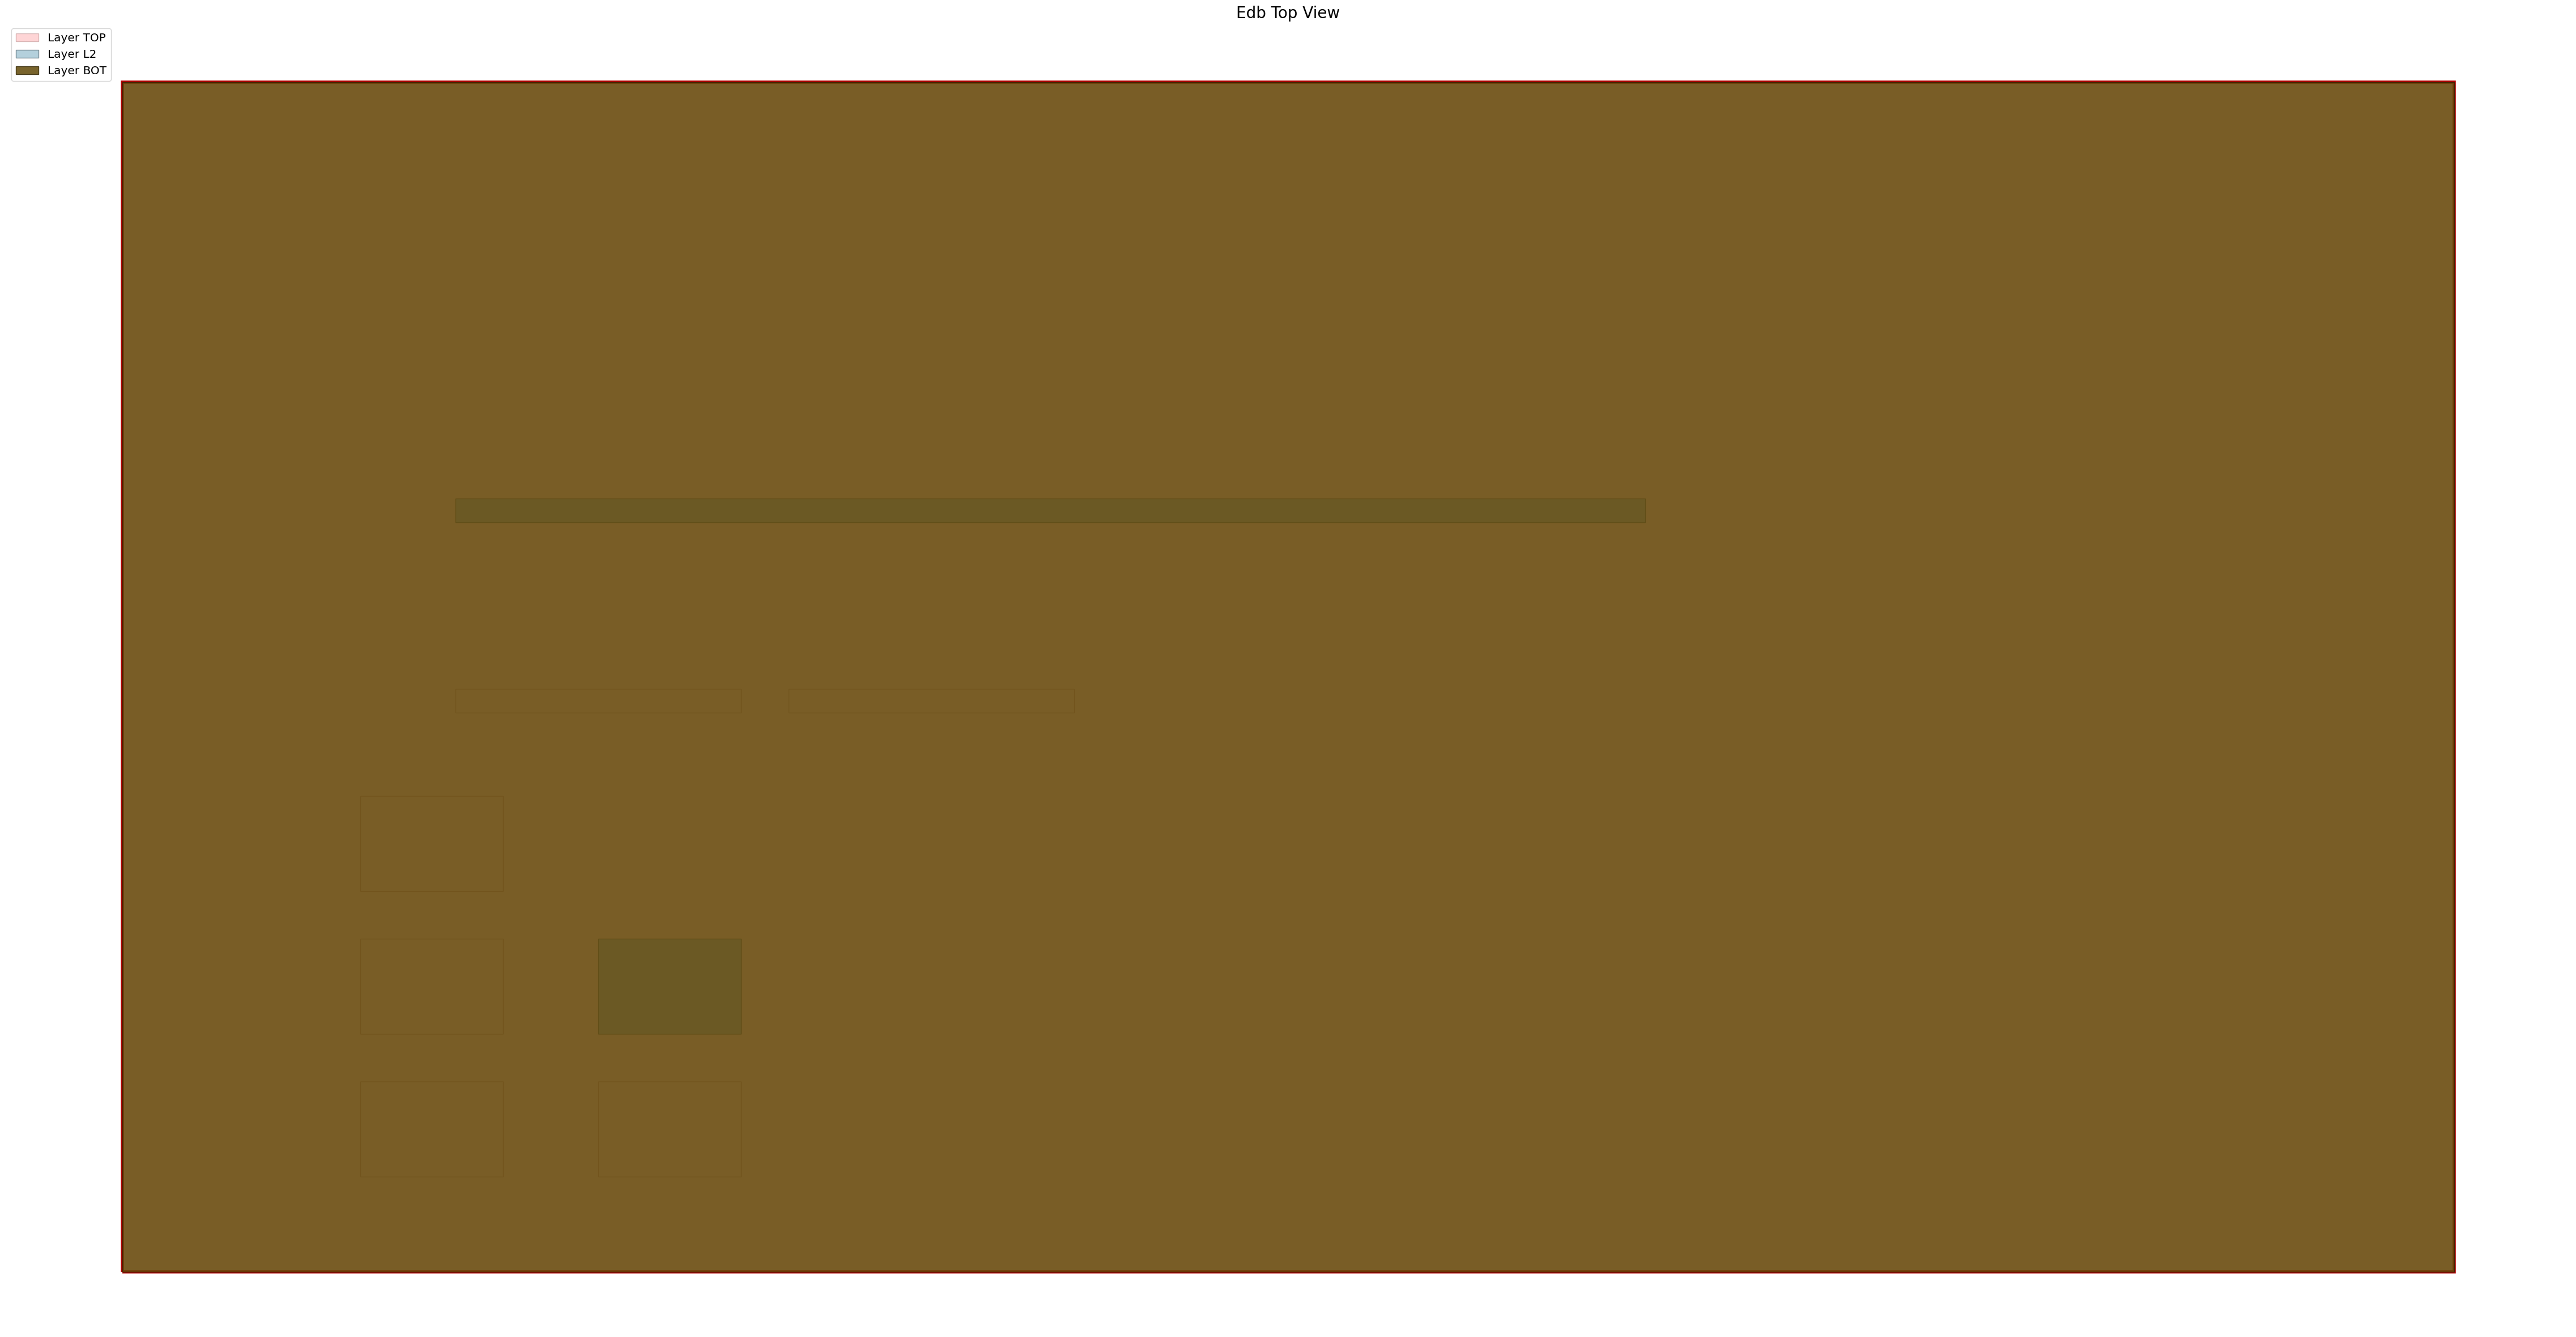

In [9]:
toolkit.logger.info("Play with EDB")
cell_names = toolkit.edb.cell_names
toolkit.edb.nets.plot()

## Save and release EDB

Save and release EDB.

In [10]:
toolkit.close_edb()

PyAEDT INFO: EDB file release time: 0.00ms


INFO - EDB is closed.


True

## Remove temporary folder

Remove the temporary folder.

In [11]:
shutil.rmtree(temp_folder, ignore_errors=True)